In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfa = pd.read_csv('synth_temp.csv')

In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  1950 non-null   float64
 1   Year                1950 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 30.6 KB


In [5]:
dfa.shape

(1950, 2)

In [6]:
dfa.Year.nunique()

170

In [7]:
dfa.describe()

AverageTemperature         Year
count         1950.000000  1950.000000
mean            17.591453  1936.252308
std              1.502507    44.236548
min             11.184445  1841.000000
25%             17.136046  1901.000000
50%             17.745062  1941.000000
75%             18.552483  1972.000000
max             20.574135  2010.000000

In [8]:
dfa = dfa.loc[dfa.Year > 1901]

In [9]:
dfa.Year.nunique()

109

In [10]:
dfa.head()

AverageTemperature  Year
366           16.973653  1902
367           17.181773  1903
368           17.436933  1904
369           17.688948  1905
370           17.811166  1906

In [12]:
len(dfa[dfa['Year'] == 1902])

12

In [13]:
len(dfa[dfa['Year'] == 1950])

24

In [14]:
len(dfa[dfa['Year'] == 2001])

12

In [15]:
dfa_grp_year = dfa.groupby('Year').agg(np.mean)
dfa_grp_year.head()

AverageTemperature
Year                    
1902           17.438122
1903           17.375456
1904           17.558674
1905           17.740646
1906           17.501770

In [16]:
len(dfa_grp_year)

109

In [17]:
type(dfa_grp_year)

pandas.core.frame.DataFrame

In [18]:
dfa[dfa['Year'] == 1902]

AverageTemperature  Year
366            16.973653  1902
436            17.091185  1902
506            17.763247  1902
576            17.428301  1902
646            17.808184  1902
716            17.101866  1902
786            17.139747  1902
856            17.613425  1902
926            17.248507  1902
996            17.356380  1902
1066           17.543684  1902
1136           18.189284  1902

In [19]:
rw = 10
roll_df = dfa_grp_year.AverageTemperature.rolling(rw).mean()

In [20]:
roll_df

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
          ...    
2006    19.548792
2007    19.591266
2008    19.631821
2009    19.671825
2010    19.710821
Name: AverageTemperature, Length: 109, dtype: float64

In [21]:
roll_df.head(15)

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
1907          NaN
1908          NaN
1909          NaN
1910          NaN
1911    17.501145
1912    17.502700
1913    17.500737
1914    17.487112
1915    17.466333
1916    17.460069
Name: AverageTemperature, dtype: float64

In [22]:
fig = plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

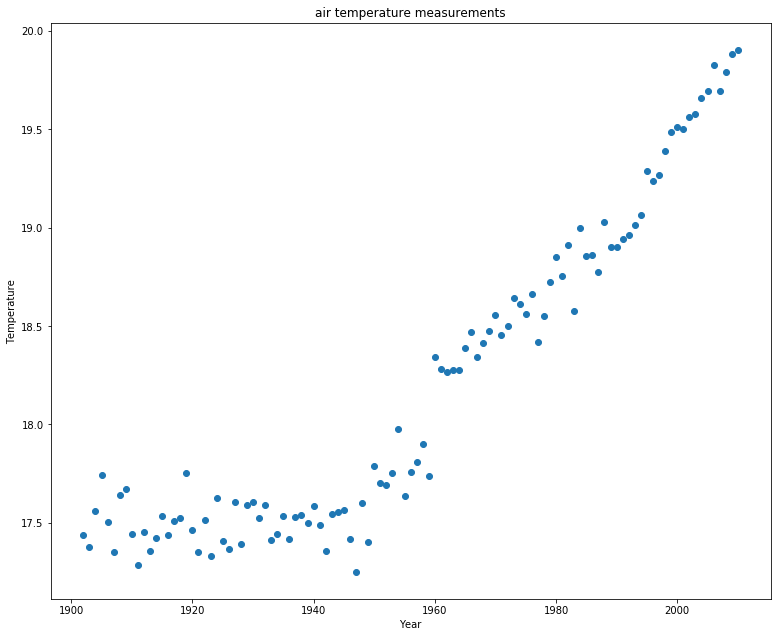

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([1,1,1,1])

ax.scatter(dfa_grp_year.index, dfa_grp_year.AverageTemperature, label="original data")

ax.set_title("air temperature measurements")
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

plt.show()

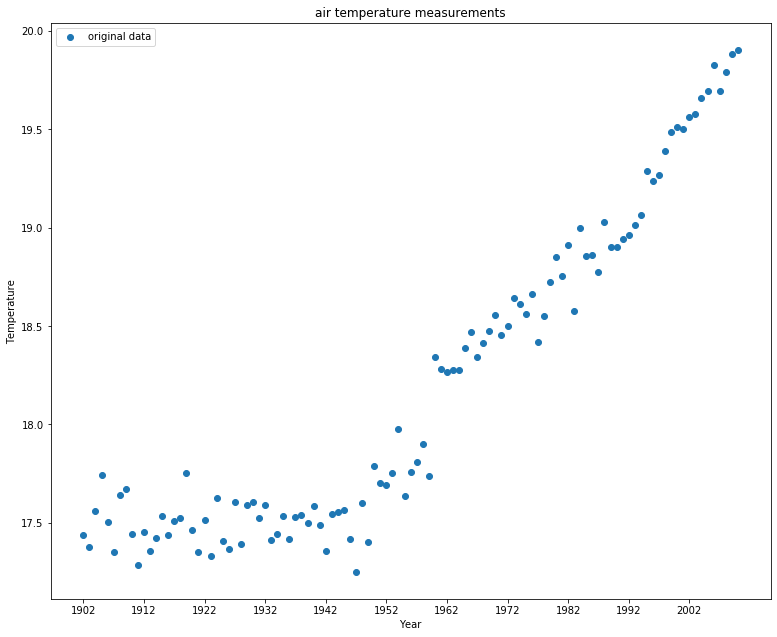

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([1,1,1,1])

ax.scatter(dfa_grp_year.index, dfa_grp_year.AverageTemperature, label="original data")

ax.set_title("air temperature measurements")
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

ax.set_xticks(range(dfa_grp_year.index.min(), dfa_grp_year.index.max(), 10))
ax.legend(loc='upper left')

plt.show()

In [28]:
pass

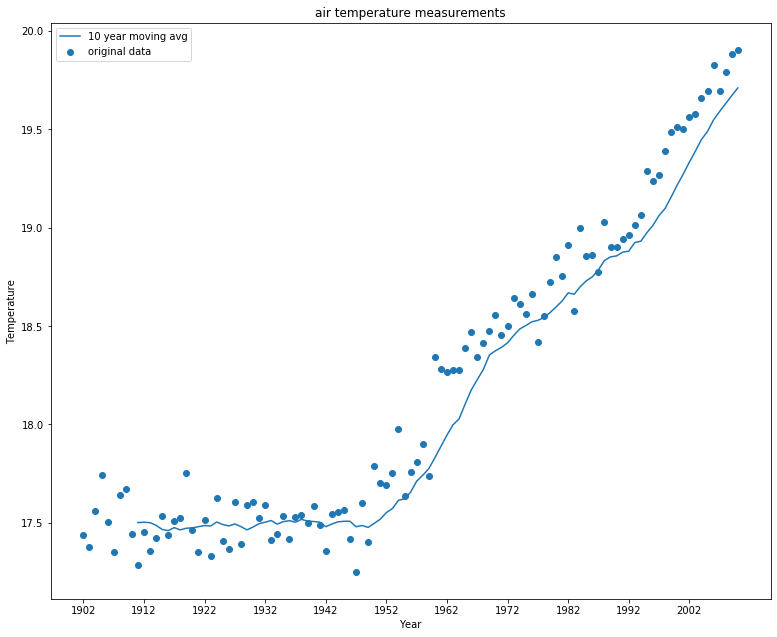

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([1,1,1,1])

ax.scatter(dfa_grp_year.index, dfa_grp_year.AverageTemperature, label="original data")
ax.plot(dfa_grp_year.index, roll_df, label='10 year moving avg')

ax.set_title("air temperature measurements")
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

ax.set_xticks(range(dfa_grp_year.index.min(), dfa_grp_year.index.max(), 10))
ax.legend(loc='upper left')

plt.show()

#### Least Squares Method



In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.fit(dfa_grp_year.index.values.reshape(-1, 1), dfa_grp_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
model.coef_

array([0.02314646])

In [36]:
model.intercept_

-27.08038666079996

In [38]:
trend_x = np.array([dfa_grp_year.index.values.min(), dfa_grp_year.index.values.mean(), 
                    dfa_grp_year.index.values.max() 
])

In [39]:
trend_y = model.predict(trend_x.reshape((-1, 1)))

In [40]:
trend_y

array([16.94418185, 18.19409074, 19.44399962])

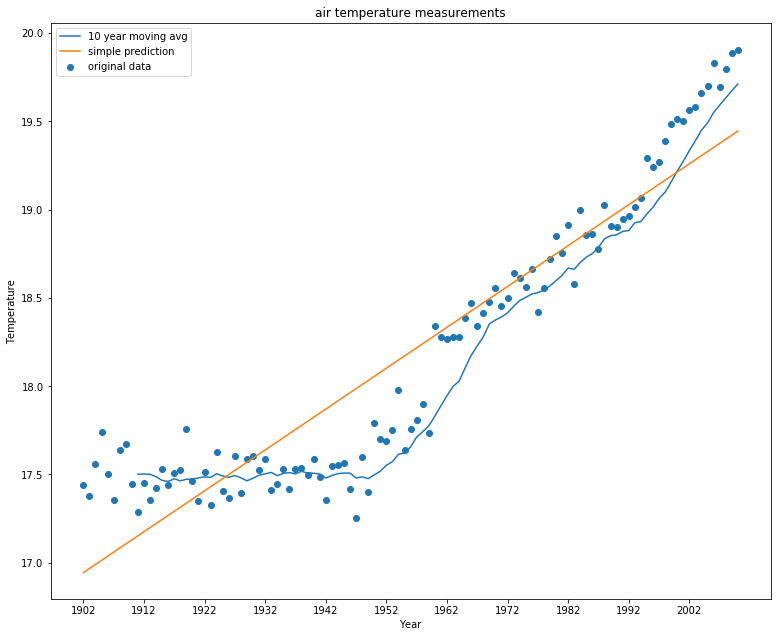

In [41]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([1,1,1,1])

ax.scatter(dfa_grp_year.index, dfa_grp_year.AverageTemperature, label="original data")
ax.plot(dfa_grp_year.index, roll_df, label='10 year moving avg')
ax.plot(trend_x, trend_y, label='simple prediction')

ax.set_title("air temperature measurements")
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

ax.set_xticks(range(dfa_grp_year.index.min(), dfa_grp_year.index.max(), 10))
ax.legend(loc='upper left')

plt.show()

#### R squared value 


In [42]:
r2 = model.score(dfa_grp_year.index.values.reshape((-1, 1)), dfa_grp_year.AverageTemperature)

In [43]:
print(round(r2, 2))

0.86


##### dummy variables

In [45]:
dfa_grp_year.index

Int64Index([1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year', length=109)

In [46]:
dfa_grp_year['Year'] = dfa_grp_year.index

In [47]:
dfa_grp_year

AverageTemperature  Year
Year                          
1902           17.438122  1902
1903           17.375456  1903
1904           17.558674  1904
1905           17.740646  1905
1906           17.501770  1906
...                  ...   ...
2006           19.827744  2006
2007           19.694244  2007
2008           19.793876  2008
2009           19.884571  2009
2010           19.903760  2010

[109 rows x 2 columns]

In [48]:
#   1960, 1945

In [49]:
dfa_grp_year['great_1960'] = [0 if year < 1960 else 10 for year in dfa_grp_year.Year]

In [52]:
dfa_grp_year.loc[1965]

AverageTemperature      18.386799
Year                  1965.000000
great_1960              10.000000
Name: 1965, dtype: float64

In [53]:
dfa_grp_year['great_1945'] = [0 if year < 1945 else 10 for year in dfa_grp_year.Year]

In [54]:
dfa_grp_year

AverageTemperature  Year  great_1960  great_1945
Year                                                  
1902           17.438122  1902           0           0
1903           17.375456  1903           0           0
1904           17.558674  1904           0           0
1905           17.740646  1905           0           0
1906           17.501770  1906           0           0
...                  ...   ...         ...         ...
2006           19.827744  2006          10          10
2007           19.694244  2007          10          10
2008           19.793876  2008          10          10
2009           19.884571  2009          10          10
2010           19.903760  2010          10          10

[109 rows x 4 columns]

In [55]:
model.fit(dfa_grp_year[['Year', 'great_1960', 'great_1945']], dfa_grp_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
r2 = model.score(dfa_grp_year[['Year', 'great_1960', 'great_1945']], dfa_grp_year.AverageTemperature)

In [58]:
print(round(r2, 4))

0.9128


In [59]:
x = np.linspace(dfa_grp_year.index.min(), dfa_grp_year.index.max(), 20)

In [60]:
x

array([1902.        , 1907.68421053, 1913.36842105, 1919.05263158,
       1924.73684211, 1930.42105263, 1936.10526316, 1941.78947368,
       1947.47368421, 1953.15789474, 1958.84210526, 1964.52631579,
       1970.21052632, 1975.89473684, 1981.57894737, 1987.26315789,
       1992.94736842, 1998.63157895, 2004.31578947, 2010.        ])

In [61]:
trend_x = np.zeros((20, 3))

In [63]:
trend_x[:, 0] = x #first column
trend_x[:, 1] = [10 if _x > 1960 else 0 for _x in x] #second column
trend_x[:, 2] = [10 if _x > 1945 else 0 for _x in x]  #third column

In [64]:
trend_y = model.predict(trend_x)

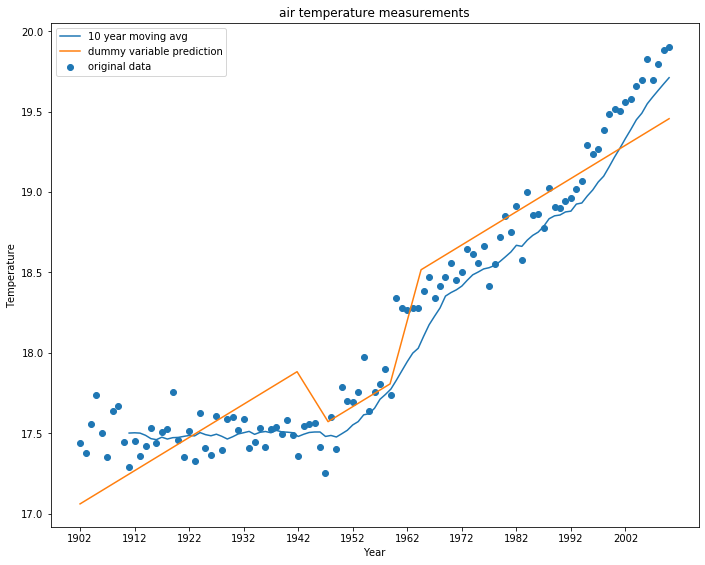

In [66]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_axes([1,1,1,1])

ax.scatter(dfa_grp_year.index, dfa_grp_year.AverageTemperature, label="original data")
ax.plot(dfa_grp_year.index, roll_df, label='10 year moving avg')
#ax.plot(trend_x, trend_y, label='simple prediction')
ax.plot(trend_x[:,0], trend_y, label='dummy variable prediction')

ax.set_title("air temperature measurements")
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

ax.set_xticks(range(dfa_grp_year.index.min(), dfa_grp_year.index.max(), 10))
ax.legend(loc='upper left')

plt.show()

In [67]:
# overfitting

##### parabolic

$y = ax^2 + mx + c$

In [68]:
dfa_grp_year

AverageTemperature  Year  great_1960  great_1945
Year                                                  
1902           17.438122  1902           0           0
1903           17.375456  1903           0           0
1904           17.558674  1904           0           0
1905           17.740646  1905           0           0
1906           17.501770  1906           0           0
...                  ...   ...         ...         ...
2006           19.827744  2006          10          10
2007           19.694244  2007          10          10
2008           19.793876  2008          10          10
2009           19.884571  2009          10          10
2010           19.903760  2010          10          10

[109 rows x 4 columns]

In [69]:
dfa_grp_year['Year2'] = dfa_grp_year.index ** 2

In [70]:
dfa_grp_year

AverageTemperature  Year  great_1960  great_1945    Year2
Year                                                           
1902           17.438122  1902           0           0  3617604
1903           17.375456  1903           0           0  3621409
1904           17.558674  1904           0           0  3625216
1905           17.740646  1905           0           0  3629025
1906           17.501770  1906           0           0  3632836
...                  ...   ...         ...         ...      ...
2006           19.827744  2006          10          10  4024036
2007           19.694244  2007          10          10  4028049
2008           19.793876  2008          10          10  4032064
2009           19.884571  2009          10          10  4036081
2010           19.903760  2010          10          10  4040100

[109 rows x 5 columns]

In [71]:
model.fit(dfa_grp_year[['Year2', 'Year']], dfa_grp_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
r2 = model.score(dfa_grp_year[['Year2', 'Year']], dfa_grp_year.AverageTemperature)

In [73]:
round(r2, 4)

0.9627

In [76]:
x = np.linspace(dfa_grp_year['Year'].min(), dfa_grp_year['Year'].max(), 20)


In [77]:
trend_x = np.zeros((20, 2))

trend_x[:, 0] = x ** 2 
trend_x[:, 1] = x

In [78]:
trend_y = model.predict(trend_x)

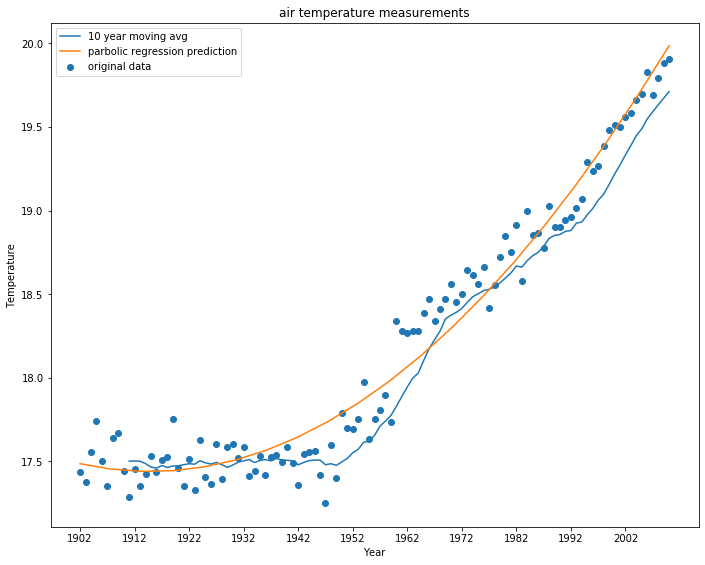

In [79]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_axes([1,1,1,1])

ax.scatter(dfa_grp_year.index, dfa_grp_year.AverageTemperature, label="original data")
ax.plot(dfa_grp_year.index, roll_df, label='10 year moving avg')
#ax.plot(trend_x, trend_y, label='simple prediction')
#ax.plot(trend_x[:,0], trend_y, label='dummy variable prediction')
ax.plot(trend_x[:,1], trend_y, label='parbolic regression prediction')

ax.set_title("air temperature measurements")
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

ax.set_xticks(range(dfa_grp_year.index.min(), dfa_grp_year.index.max(), 10))
ax.legend(loc='upper left')

plt.show()

In [ ]:
pd.read_csv('aus')